<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/MultivariableLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this task, I am performing a Multivariable Linear Regression using Gradient Descent. My dataset has 2 independent variables (age, experience)  and 1 dependent variable (income)
Goal: find the parameters m1, m2 and c that minimizes the MSE:
{y = m1x1 + m2x2 + c}

In [1]:
!pip install kagglehub

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import kagglehub as kh

Importing the necessary packages, downloading the dataset using kagglehub -- loading the data uing pandas and inspecting it to see whether it has missing values.. The data is clean and it has a 3 columns and 20 rows

In [ ]:
path = kh.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print (path)

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.
/kaggle/input/multiple-linear-regression-dataset


In [ ]:
print (os.listdir(path))

['multiple_linear_regression_dataset.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'multiple_linear_regression_dataset.csv'))

df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [ ]:
print("\nDataset Summary:\n",df.describe() )


Dataset Summary:
              age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


We take our columns and convert them to numpy arrays for easier application of the mathematical expressions to the data.

In [ ]:
x1 = np.array(df["age"].values)
x2 = np.array(df["experience"].values)
y = np.array(df["income"].values)

n = len(y)  #20

Initialize out initial parameters of the model .. m1, m2, c, learning rate and epochs

In [31]:
m1 = 0
m2 = 0
c = 0
lr = 0.00001
epochs = 1000000

We define two functions of finding the predicted values of y (y_pred)  and the function to find the Mean Squared Error MSE

In [32]:
# functiions
def prediction (x1, x2, m1, m2, c):
  return m1 * x1 + m2 * x2 + c

def mse (y, y_pred):
  return np.mean((y - y_pred)**2)

In [33]:
# gradient descent algorithm
cost_history = []

for epoch in range(epochs):
  y_pred = prediction (x1, x2, m1, m2, c)
  error= y - y_pred

  #compute gradients dm1, dm2, dc
  dm1 = (-2/n) * np.sum(x1 * error)
  dm2 = (-2/n) * np.sum(x2 * error)
  dc = (-2/n) * np.sum(error)

  # update the parameters
  m1 = m1 - lr * dm1
  m2 = m2 - lr * dm2
  c = c - lr * dc

  # compute cost
  cost =  mse (y, y_pred)

  cost_history.append(cost)

  # print mse after each epoch
  if (epoch + 1) % 20000 == 0: # Print less frequently for more epochs
    print (f"Epoch {epoch+1}: MSE = {cost:.4f}")

print(f"\nFinal m1: {m1:.4f}, m2: {m2:.4f}, c: {c:.4f}")

Epoch 20000: MSE = 51091923.8199
Epoch 40000: MSE = 49038299.7917
Epoch 60000: MSE = 47073635.6725
Epoch 80000: MSE = 45190225.5248
Epoch 100000: MSE = 43384708.0794
Epoch 120000: MSE = 41653861.9066
Epoch 140000: MSE = 39994598.8063
Epoch 160000: MSE = 38403958.2981
Epoch 180000: MSE = 36879102.3389
Epoch 200000: MSE = 35417310.2594
Epoch 220000: MSE = 34015973.9097
Epoch 240000: MSE = 32672593.0058
Epoch 260000: MSE = 31384770.6687
Epoch 280000: MSE = 30150209.1477
Epoch 300000: MSE = 28966705.7210
Epoch 320000: MSE = 27832148.7650
Epoch 340000: MSE = 26744513.9875
Epoch 360000: MSE = 25701860.8151
Epoch 380000: MSE = 24702328.9316
Epoch 400000: MSE = 23744134.9581
Epoch 420000: MSE = 22825569.2714
Epoch 440000: MSE = 21944992.9540
Epoch 460000: MSE = 21100834.8690
Epoch 480000: MSE = 20291588.8580
Epoch 500000: MSE = 19515811.0527
Epoch 520000: MSE = 18772117.2997
Epoch 540000: MSE = 18059180.6899
Epoch 560000: MSE = 17375729.1921
Epoch 580000: MSE = 16720543.3825
Epoch 600000: MSE 

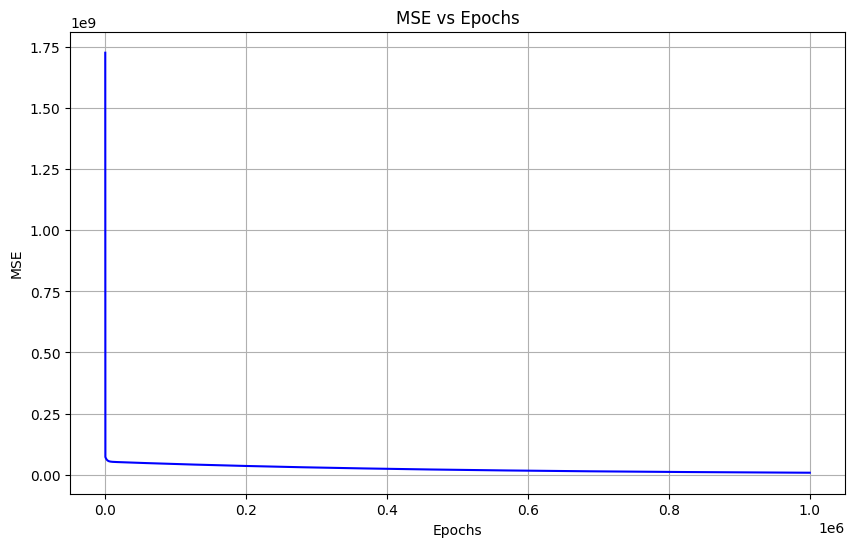

In [34]:
# ploting mse
plt.figure(figsize=(10,6))
plt.plot(range(epochs), cost_history, "b-")
plt.title("MSE vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

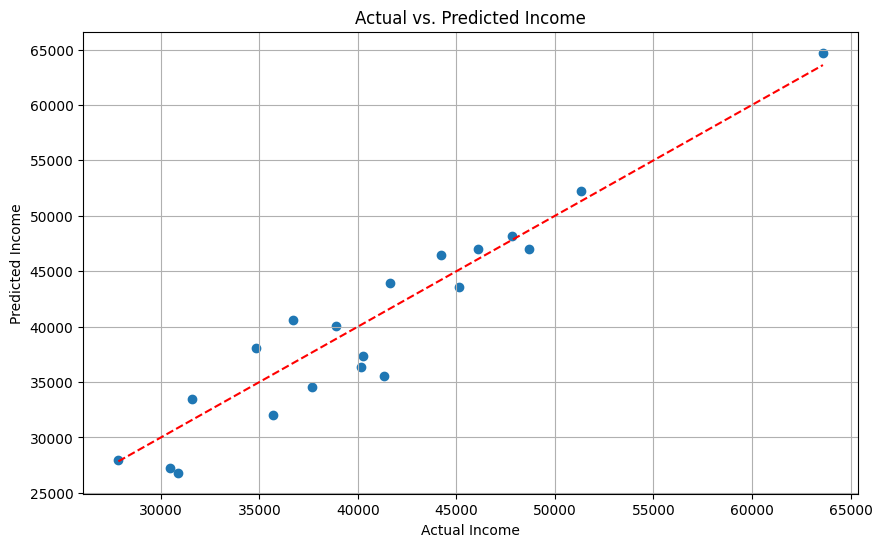

In [35]:
y_pred_final = prediction(x1, x2, m1, m2, c)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_final)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs. Predicted Income")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--') # Ideal fit line
plt.grid(True)
plt.show()